# Análise de Incêndios no Brasil em 2024

Matheus dos Anjos Pinheiro

Este projeto tem como objetivo realizar uma análise detalhada dos incêndios no Brasil em 2024, empregando métodos de análise estatística e de séries temporais para identificar padrões sazonais e regionais. O estudo busca explorar a relação entre variáveis climáticas, como o número de dias sem chuva, a precipitação média e o índice de risco de fogo, com o intuito de revelar fatores que contribuem para o aumento ou diminuição da incidência de incêndios nas diversas regiões brasileiras.

## Bibliotecas usadas

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
os.listdir(pasta_dados_incendios)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Dataset_FireWatch_Brazil_Q1_2024.csv',
 'Dataset_FireWatch_Brazil_Q2_2024.csv',
 'Dataset_FireWatch_Brazil_Q3_2024.csv',
 'Dataset_FireWatch_Brazil_Completo_2024.csv',
 'mapa python.shx',
 'mapa python.dbf',
 'mapa python.shp']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_completo = pd.read_csv(caminho_arquivo_completo)

# Visualize os dados
print(df_completo.head())

# Salvar os dados em um arquivo CSV
df_completo.to_csv('dados_para_power_bi.csv', index=False)

from google.colab import files
files.download('dados_para_power_bi.csv')

         data                 municipio    estado     bioma  \
0  2024-01-01             VALE DO ANARI  RONDÔNIA  Amazônia   
1  2024-01-01  SÃO GABRIEL DA CACHOEIRA  AMAZONAS  Amazônia   
2  2024-01-01                 MANAQUIRI  AMAZONAS  Amazônia   
3  2024-01-01                     JUTAÍ  AMAZONAS  Amazônia   
4  2024-01-01                   AUTAZES  AMAZONAS  Amazônia   

   avg_numero_dias_sem_chuva  avg_precipitacao  avg_risco_fogo  avg_frp  
0                        0.0           1698.00             0.0    13.00  
1                        0.2            206.80             0.0    81.40  
2                        0.0             60.00             0.0    27.00  
3                        2.0            776.00             0.0   211.00  
4                        0.0              2.22             0.0    97.67  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conhecendo os dados

In [ ]:
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')
df_completo = pd.read_csv(caminho_arquivo_completo)
df_completo.head()

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,VALE DO ANARI,RONDÔNIA,Amazônia,0.0,1698.00,0.0,13.00
1,2024-01-01,SÃO GABRIEL DA CACHOEIRA,AMAZONAS,Amazônia,0.2,206.80,0.0,81.40
2,2024-01-01,MANAQUIRI,AMAZONAS,Amazônia,0.0,60.00,0.0,27.00
3,2024-01-01,JUTAÍ,AMAZONAS,Amazônia,2.0,776.00,0.0,211.00
4,2024-01-01,AUTAZES,AMAZONAS,Amazônia,0.0,2.22,0.0,97.67


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171249 entries, 0 to 171248
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       171249 non-null  object 
 1   municipio                  171249 non-null  object 
 2   estado                     171249 non-null  object 
 3   bioma                      171248 non-null  object 
 4   avg_numero_dias_sem_chuva  171249 non-null  float64
 5   avg_precipitacao           171249 non-null  float64
 6   avg_risco_fogo             171249 non-null  float64
 7   avg_frp                    171160 non-null  float64
dtypes: float64(4), object(4)
memory usage: 10.5+ MB


In [ ]:
df_completo.describe()

,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
count,171249.000000,171249.000000,171249.000000,171160.000000
mean,23.176133,100.829799,55.190840,117.577072
std,30.655699,458.803679,42.796038,199.384446
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.500000,27.287500
50%,8.710000,0.000000,66.000000,56.000000
75%,32.750000,0.000000,100.000000,110.500000
max,120.000000,25298.000000,100.000000,9300.570000


In [ ]:
df_completo.describe()
df_completo.isnull().sum()

,0
data,0
municipio,0
estado,0
bioma,1
avg_numero_dias_sem_chuva,0
avg_precipitacao,0
avg_risco_fogo,0
avg_frp,89


## Tratamento dos dados

In [ ]:
df_completo = pd.read_csv(caminho_arquivo_completo)

In [ ]:
#procura valores ausentes na coluna e substitui esses valores nulos pela mediana dos valores presentes na coluna.
df_completo['avg_frp'] = df_completo['avg_frp'].fillna(df_completo['avg_frp'].median())

#Para a coluna bioma, substitui os valores nulos pela moda da coluna.
df_completo['bioma'] = df_completo['bioma'].fillna(df_completo['bioma'].mode()[0])

# número de valores nulos restantes em cada coluna
print(df_completo.isnull().sum())

data                         0
municipio                    0
estado                       0
bioma                        0
avg_numero_dias_sem_chuva    0
avg_precipitacao             0
avg_risco_fogo               0
avg_frp                      0
dtype: int64


# Incidência de Incêndios

1. Distribuição de Incêndios por Data: Analisando a distribuição dos incêndios ao longo dos meses de 2024, notamos os períodos do ano com mais e menos incidências.

Distribuição de Incêndios por Mês:
        data  num_incendios
0 2024-01-01          20017
1 2024-02-01          11511
2 2024-03-01          12225
3 2024-04-01           9256
4 2024-05-01          17035
5 2024-06-01          22688
6 2024-07-01          26796
7 2024-08-01          22534
8 2024-09-01          29187


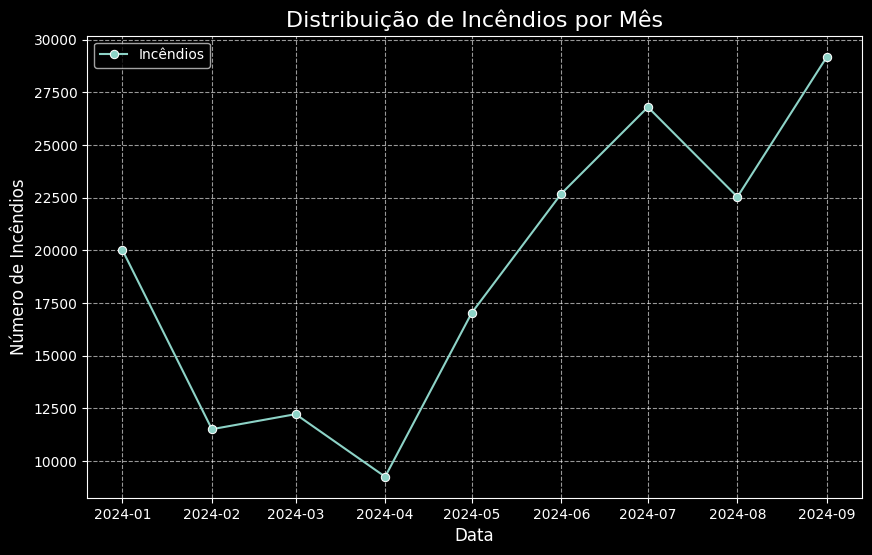

In [ ]:
def distribuicao_incendios_por_data(caminho_arquivo):
    dados = pd.read_csv(caminho_arquivo)

    # Converter a coluna de data para o formato datetime
    dados['data'] = pd.to_datetime(dados['data'])

    incendios_por_mes = dados.groupby(dados['data'].dt.to_period('M')).size().reset_index(name='num_incendios')

    # Converter a coluna de data de volta para o formato datetime para facilitar a visualização
    incendios_por_mes['data'] = incendios_por_mes['data'].dt.to_timestamp()

    print("Distribuição de Incêndios por Mês:")
    print(incendios_por_mes)

    return incendios_por_mes

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')

distribuicao_incendios = distribuicao_incendios_por_data(caminho_arquivo_completo)

# Gráfico de linhas
plt.figure(figsize=(10, 6))
sns.lineplot(x='data', y='num_incendios', data=distribuicao_incendios, marker='o', label='Incêndios')

plt.title('Distribuição de Incêndios por Mês', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Incêndios', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()


O maior número de incêndios ocorreu em setembro (29.187 focos) e o menor em abril (9.256 focos).

2. Distribuição de Incêndios por Região

Distribuição de Incêndios por Região:
         regiao  num_incendios
0      Nordeste          50231
1       Sudeste          43846
2         Norte          31828
3  Centro-Oeste          30487
4           Sul          14857


<ipython-input-49-d65d6ebd6f1e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_incendios', y='regiao', data=incendios_por_regiao, palette='Reds_r')


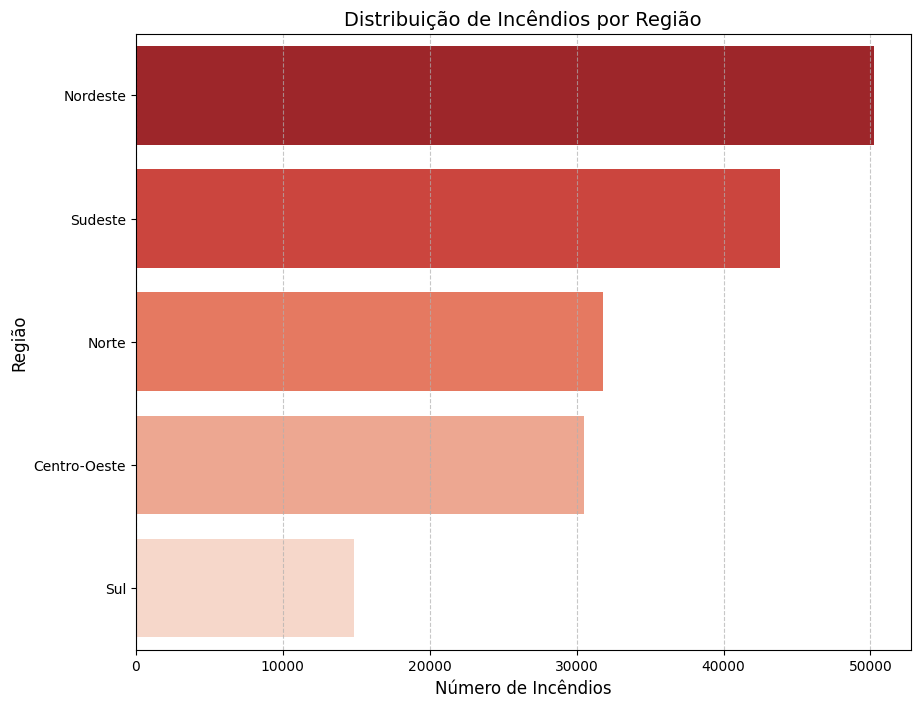

In [ ]:
dados_completos = pd.read_csv('/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv')

mapa_regioes = {
    'ACRE': 'Norte',
    'ALAGOAS': 'Nordeste',
    'AMAPÁ': 'Norte',
    'AMAZONAS': 'Norte',
    'BAHIA': 'Nordeste',
    'CEARÁ': 'Nordeste',
    'DISTRITO FEDERAL': 'Centro-Oeste',
    'ESPÍRITO SANTO': 'Sudeste',
    'GOIÁS': 'Centro-Oeste',
    'MARANHÃO': 'Nordeste',
    'MATO GROSSO': 'Centro-Oeste',
    'MATO GROSSO DO SUL': 'Centro-Oeste',
    'MINAS GERAIS': 'Sudeste',
    'PARÁ': 'Norte',
    'PARAÍBA': 'Nordeste',
    'PARANÁ': 'Sul',
    'PERNAMBUCO': 'Nordeste',
    'PIAUÍ': 'Nordeste',
    'RIO DE JANEIRO': 'Sudeste',
    'RIO GRANDE DO NORTE': 'Nordeste',
    'RIO GRANDE DO SUL': 'Sul',
    'RONDÔNIA': 'Norte',
    'RORAIMA': 'Norte',
    'SANTA CATARINA': 'Sul',
    'SÃO PAULO': 'Sudeste',
    'SERGIPE': 'Nordeste',
    'TOCANTINS': 'Norte'
}

# mapear regiões
dados_completos['estado'] = dados_completos['estado'].str.strip().str.upper()
dados_completos['regiao'] = dados_completos['estado'].map(mapa_regioes)

estados_sem_regiao = dados_completos[dados_completos['regiao'].isnull()]['estado'].unique()
if len(estados_sem_regiao) > 0:
    print(f"Atenção: Alguns estados não possuem região mapeada: {estados_sem_regiao}")

# Agrupar por região e contar o número total de incêndios
incendios_por_regiao = dados_completos['regiao'].value_counts().reset_index()
incendios_por_regiao.columns = ['regiao', 'num_incendios']

print("Distribuição de Incêndios por Região:")
print(incendios_por_regiao)

# Visualização com gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='num_incendios', y='regiao', data=incendios_por_regiao, palette='Reds_r')

plt.title('Distribuição de Incêndios por Região', fontsize=14)
plt.xlabel('Número de Incêndios', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

O Nordeste foi a região mais afetada (50.231 focos), seguido pelo Sudeste (43.846), enquanto o Sul teve menos ocorrências (14.857).

3. Distribuição de Incêndios por Estado

Distribuição de Incêndios por Estado:
                 estado  num_incendios  porcentagem
0          MINAS GERAIS          24015    14.023440
1           MATO GROSSO          15090     8.811730
2                 BAHIA          14146     8.260486
3             SÃO PAULO          14031     8.193333
4              MARANHÃO          12224     7.138144
5                  PARÁ          10809     6.311862
6             TOCANTINS           9259     5.406747
7                 GOIÁS           8870     5.179592
8                PARANÁ           7479     4.367325
9                 PIAUÍ           6968     4.068929
10   MATO GROSSO DO SUL           6346     3.705715
11                CEARÁ           4897     2.859579
12             AMAZONAS           4607     2.690235
13           PERNAMBUCO           4226     2.467752
14    RIO GRANDE DO SUL           3745     2.186874
15       SANTA CATARINA           3633     2.121472
16       RIO DE JANEIRO           3251     1.898405
17             RONDÔNIA   

<ipython-input-79-0d6fcae51e30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentagem', y='estado', data=distribuicao_incendios, palette='Reds_r')


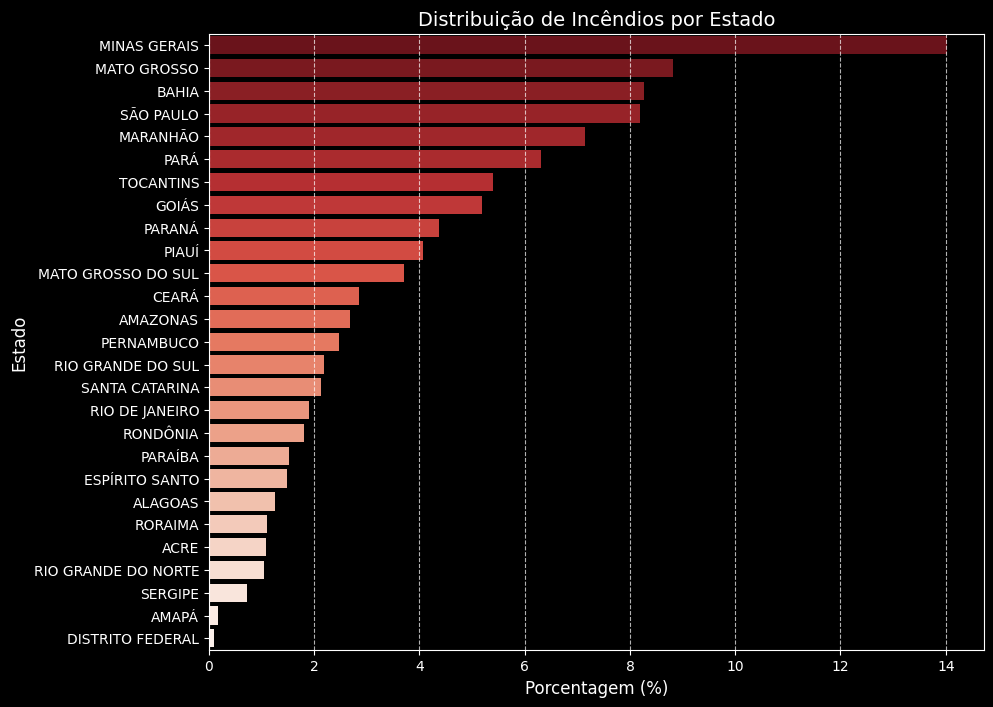

In [ ]:
def distribuicao_incendios_por_estado(caminho_arquivo):

    dados = pd.read_csv(caminho_arquivo)

    incendios_por_estado = dados['estado'].value_counts().reset_index()
    incendios_por_estado.columns = ['estado', 'num_incendios']
    incendios_por_estado['porcentagem'] = 100 * incendios_por_estado['num_incendios'] / incendios_por_estado['num_incendios'].sum()

    print("Distribuição de Incêndios por Estado:")
    print(incendios_por_estado)

    return incendios_por_estado

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')

distribuicao_incendios = distribuicao_incendios_por_estado(caminho_arquivo_completo)

plt.figure(figsize=(10, 8))
sns.barplot(x='porcentagem', y='estado', data=distribuicao_incendios, palette='Reds_r')

plt.title('Distribuição de Incêndios por Estado', fontsize=14)
plt.xlabel('Porcentagem (%)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

Minas Gerais teve o maior número de focos (24.015), seguido por Mato Grosso (15.090) e Bahia (14.146).

4. Municípios com Mais focos de Incêndio

Municípios com Mais Focos de Incêndio:
                    municipio        estado  avg_frp
135365       FRANCISCO SANTOS         PIAUÍ  9300.57
78120             XIQUE-XIQUE         BAHIA  5794.50
116234  SÃO JOSÉ DO RIO CLARO   MATO GROSSO  5482.33
33188                  MORROS      MARANHÃO  5390.33
137083                  PRATA  MINAS GERAIS  4925.75
10218    MORADA NOVA DE MINAS  MINAS GERAIS  4286.00
110806                 PARISI     SÃO PAULO  4217.50
127470              TURMALINA  MINAS GERAIS  4088.92
163213           SANTA ISABEL         GOIÁS  3947.00
154539            VERDELÂNDIA  MINAS GERAIS  3920.67


<ipython-input-95-604ca085f9bb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_frp', y='municipio', data=top_10_focos, palette='Reds_d')


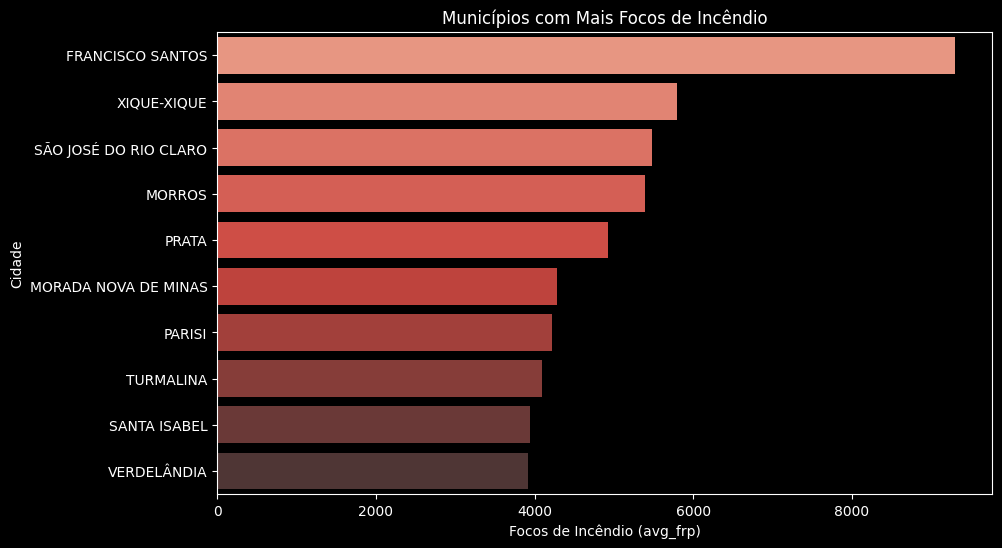

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dados_completos['regiao'] = dados_completos['estado'].map(mapa_regioes)

top_10_focos = dados_completos[['municipio', 'estado', 'avg_frp']].sort_values(by='avg_frp', ascending=False).head(10)

print("Municípios com Mais Focos de Incêndio:")
print(top_10_focos)

plt.figure(figsize=(10, 6))
sns.barplot(x='avg_frp', y='municipio', data=top_10_focos, palette='Reds_d')
plt.xlabel('Focos de Incêndio (avg_frp)')
plt.ylabel('Cidade')
plt.title('Municípios com Mais Focos de Incêndio')
plt.show()

Francisco Santos (PI) lidera com o maior valor médio de FRP (9.300,57), seguido por Xique-Xique (BA) (5.794,5) e São José do Rio Claro (MT) (5.482,33).

5. Incêndios por bioma

Número de Incêndios por Bioma (Ordenado de Menor para Maior):
            bioma  num_incendios
5        Pantanal           1466
4           Pampa           1693
1        Caatinga          24076
0        Amazônia          34702
3  Mata Atlântica          49965
2         Cerrado          59346


<ipython-input-30-4e9006a45378>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_incendios', y='bioma', data=top_biomas, palette='Purples_d')


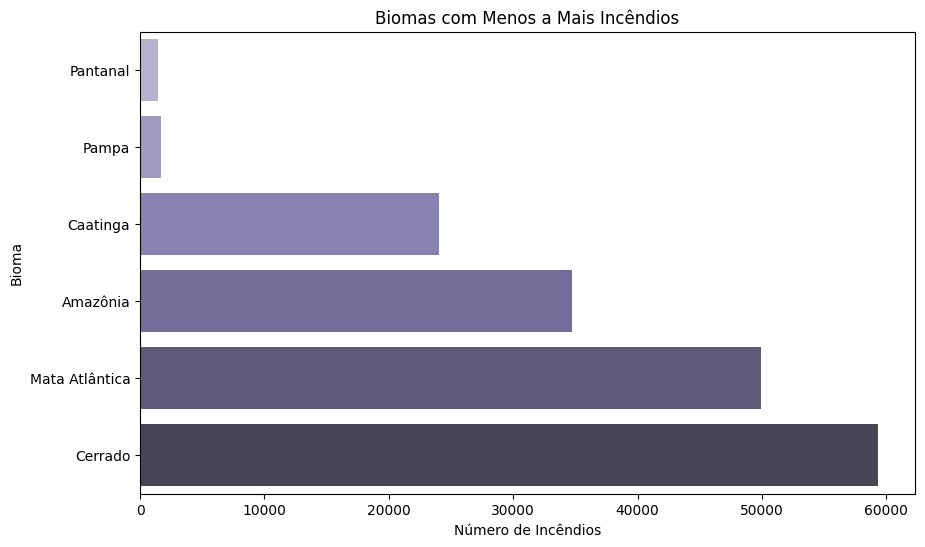

In [ ]:
# Análise de Biomas
def biomas_mais_focos(caminho_arquivo):

    dados = pd.read_csv(caminho_arquivo)
    # Remover valores nulos da coluna 'bioma'
    dados = dados.dropna(subset=['bioma'])

    # número de incêndios por bioma
    focos_por_bioma = dados.groupby('bioma').size().reset_index(name='num_incendios')

    # ordem crescente
    focos_por_bioma = focos_por_bioma.sort_values(by='num_incendios', ascending=True)

    print("Número de Incêndios por Bioma (Ordenado de Menor para Maior):")
    print(focos_por_bioma)

    return focos_por_bioma

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')

top_biomas = biomas_mais_focos(caminho_arquivo_completo)

if not top_biomas.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='num_incendios', y='bioma', data=top_biomas, palette='Purples_d')
    plt.xlabel('Número de Incêndios')
    plt.ylabel('Bioma')
    plt.title('Biomas com Menos a Mais Incêndios')
    plt.show()
else:
    print("Não há dados disponíveis para plotar o gráfico.")

Cerrado lidera com 59.346 focos, enquanto o Pantanal apresentou menos incêndios (1.466).

Condições Climáticas

1. Média de Precipitação por Estado

Média de Precipitação por Estado:
                 estado  media_precipitacao
0                  ACRE           76.588032
1               ALAGOAS          163.553553
2                 AMAPÁ          114.009519
3              AMAZONAS          158.419924
4                 BAHIA           85.212461
5                 CEARÁ           88.307601
6      DISTRITO FEDERAL          147.233039
7        ESPÍRITO SANTO           21.494284
8                 GOIÁS          104.003244
9              MARANHÃO          137.390100
10          MATO GROSSO          152.108637
11   MATO GROSSO DO SUL          114.990599
12         MINAS GERAIS           38.402935
13               PARANÁ           65.651457
14              PARAÍBA          151.572787
15                 PARÁ          171.894135
16           PERNAMBUCO          173.901477
17                PIAUÍ          100.703156
18       RIO DE JANEIRO           25.891270
19  RIO GRANDE DO NORTE          154.748106
20    RIO GRANDE DO SUL           86.56485

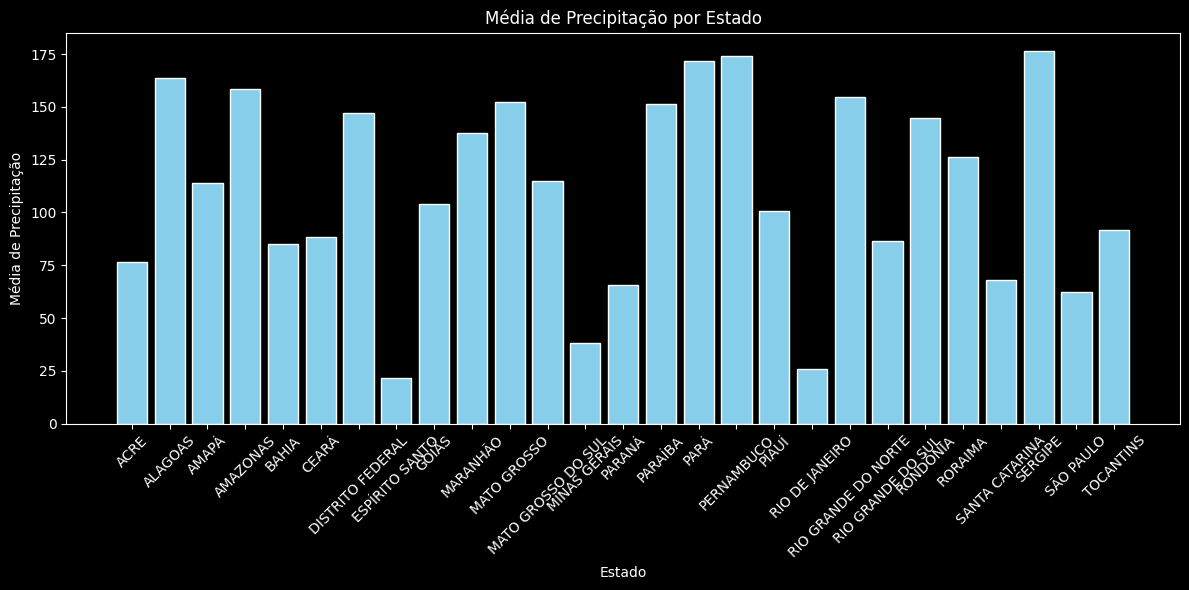

In [ ]:
media_precipitacao_estado = dados_completos.groupby('estado')['avg_precipitacao'].mean().reset_index()
media_precipitacao_estado = media_precipitacao_estado.rename(columns={'avg_precipitacao': 'media_precipitacao'})

print("Média de Precipitação por Estado:")
print(media_precipitacao_estado)

plt.figure(figsize=(12, 6))
plt.bar(media_precipitacao_estado['estado'], media_precipitacao_estado['media_precipitacao'], color='skyblue', edgecolor='white')
plt.title('Média de Precipitação por Estado')
plt.xlabel('Estado')
plt.ylabel('Média de Precipitação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pernambuco teve a maior média de precipitação (173,9 mm), enquanto Espírito Santo teve a menor (21,5 mm).

2. Estados com Mais Dias Sem Chuva

In [ ]:
def estados_mais_dias_sem_chuva(caminho_arquivo):
    # Carregar os dados
    dados = pd.read_csv(caminho_arquivo)

    # média de dias sem chuva por estado e ordenar
    dados_ordenados = dados.groupby('estado')['avg_numero_dias_sem_chuva'].mean().nlargest(10).reset_index()

    print("Os 10 estados que passaram mais dias sem chuva no Brasil:")
    print(dados_ordenados)
    return dados_ordenados

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')

top_estados_dias_sem_chuvas = estados_mais_dias_sem_chuva(caminho_arquivo_completo)

Os 10 estados que passaram mais dias sem chuva no Brasil:
             estado  avg_numero_dias_sem_chuva
0  DISTRITO FEDERAL                  47.990497
1      MINAS GERAIS                  46.917734
2             GOIÁS                  46.531140
3         TOCANTINS                  33.048730
4       MATO GROSSO                  29.988245
5    ESPÍRITO SANTO                  27.971334
6          RONDÔNIA                  25.087828
7             BAHIA                  24.092490
8             PIAUÍ                  22.534282
9          MARANHÃO                  18.701672


<ipython-input-13-7b4591e60688>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_numero_dias_sem_chuva', y='estado', data=top_estados_dias_sem_chuvas, palette='YlOrBr')


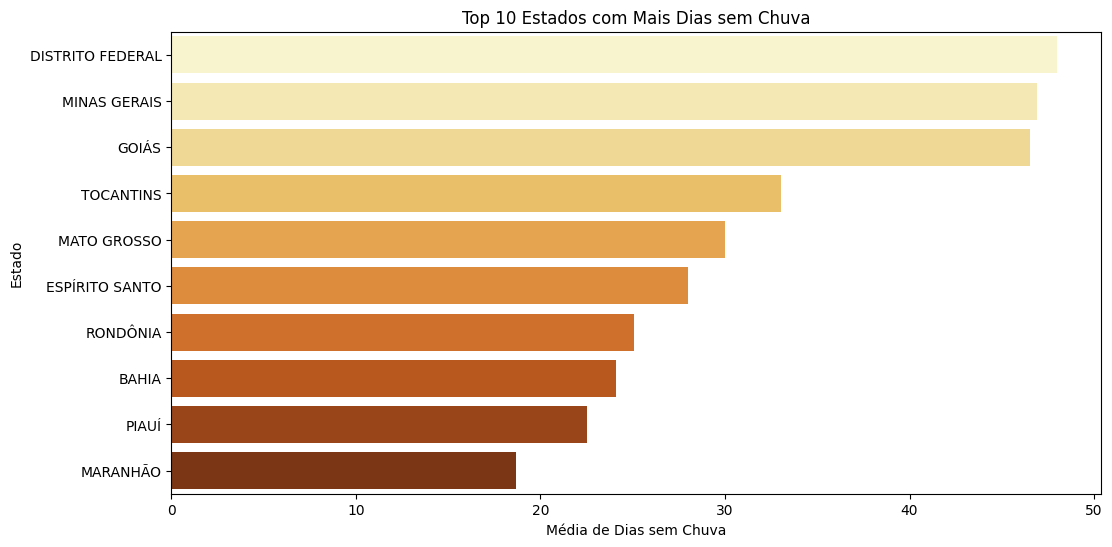

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_numero_dias_sem_chuva', y='estado', data=top_estados_dias_sem_chuvas, palette='YlOrBr')
plt.xlabel('Média de Dias sem Chuva')
plt.ylabel('Estado')
plt.title('Top 10 Estados com Mais Dias sem Chuva')
plt.show()

O Distrito Federal liderou em dias sem chuva (47,99 dias), seguido por Minas Gerais (46,9).

3. Municípios com Mais Dias Sem Chuva

<ipython-input-81-7a2987e06f38>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_numero_dias_sem_chuva', y='cidade_estado', data=top_cidades_dias_sem_chuvas, palette='YlOrBr')


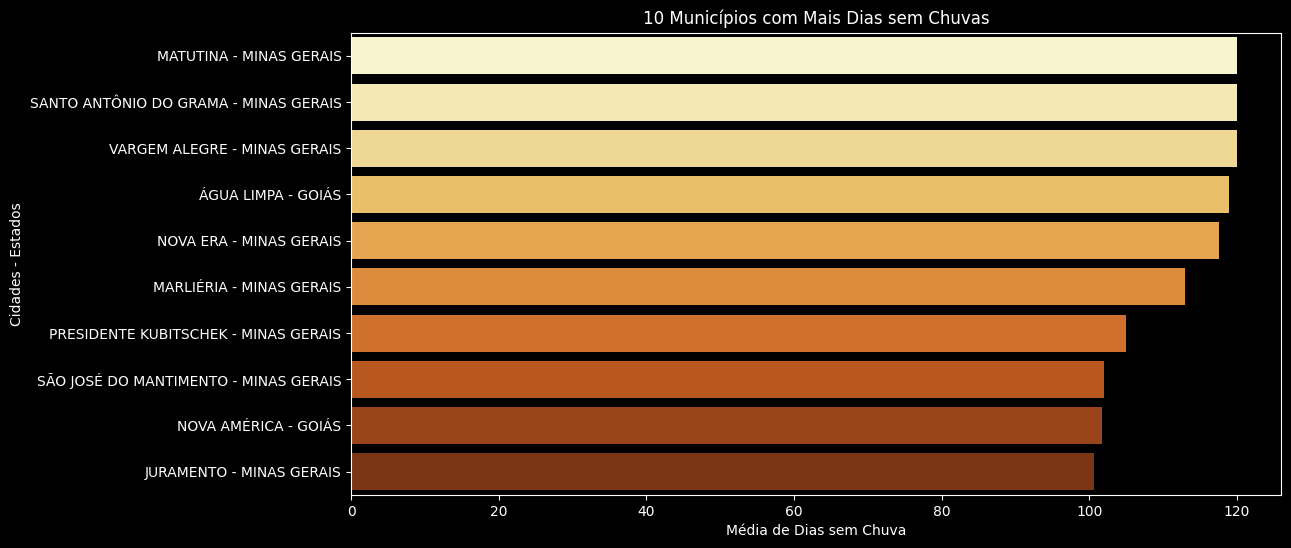

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma coluna 'cidade_estado' com o formato "Cidade - Estado"
df_completo['cidade_estado'] = df_completo['municipio'] + ' - ' + df_completo['estado']

# calcular a média de dias sem chuva, selecionando as 10 maiores médias
top_cidades_dias_sem_chuvas = df_completo.groupby('cidade_estado')['avg_numero_dias_sem_chuva'].mean().nlargest(10).reset_index()

# Configurar o gráfico de barras para exibir as cidades com mais dias sem chuva
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_numero_dias_sem_chuva', y='cidade_estado', data=top_cidades_dias_sem_chuvas, palette='YlOrBr')
plt.title('10 Municípios com Mais Dias sem Chuvas')
plt.xlabel('Média de Dias sem Chuva')
plt.ylabel('Cidades - Estados')
plt.show()

Francisco Santos (PI) foi o município com maior incidência (9.300 focos).

4. Biomas com Mais Dias Sem Chuva

Média de Dias Sem Chuva por Bioma (Ordenado de Maior para Menor):
            bioma  avg_numero_dias_sem_chuva
2         Cerrado                  35.024341
5        Pantanal                  22.796589
3  Mata Atlântica                  18.718864
1        Caatinga                  16.191752
0        Amazônia                  15.060132
4           Pampa                   5.421057


<ipython-input-82-c1033cbdb63f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_numero_dias_sem_chuva', y='bioma', data=top_biomas_dias_sem_chuva, palette='Blues_d')


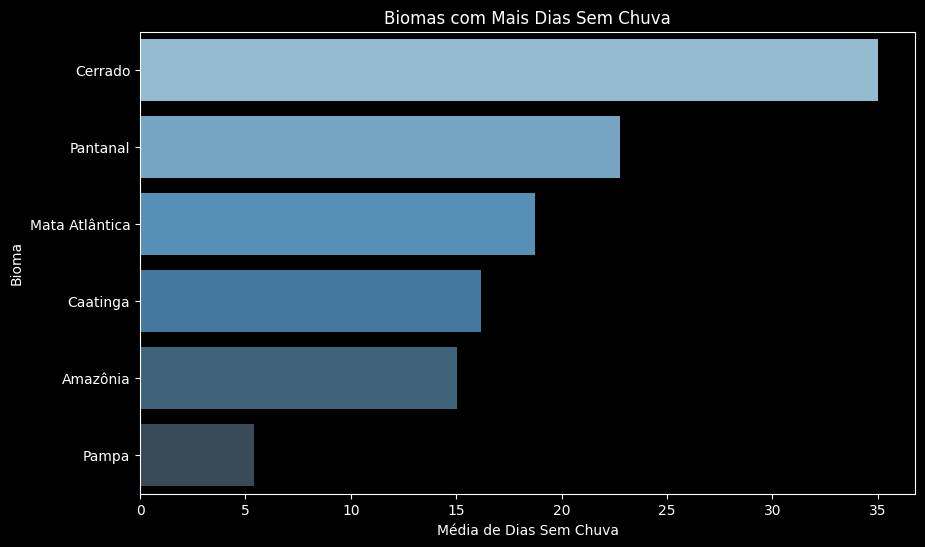

In [ ]:
def biomas_mais_dias_sem_chuva(caminho_arquivo):
    dados = pd.read_csv(caminho_arquivo)
    dados = dados.dropna(subset=['bioma', 'avg_numero_dias_sem_chuva'])
    dias_sem_chuva_por_bioma = dados.groupby('bioma')['avg_numero_dias_sem_chuva'].mean().reset_index()
    dias_sem_chuva_por_bioma = dias_sem_chuva_por_bioma.sort_values(by='avg_numero_dias_sem_chuva', ascending=False)
    print("Média de Dias Sem Chuva por Bioma (Ordenado de Maior para Menor):")
    print(dias_sem_chuva_por_bioma)
    return dias_sem_chuva_por_bioma

pasta_dados_incendios = '/content/drive/My Drive/dados_incendios'
caminho_arquivo_completo = os.path.join(pasta_dados_incendios, 'Dataset_FireWatch_Brazil_Completo_2024.csv')

top_biomas_dias_sem_chuva = biomas_mais_dias_sem_chuva(caminho_arquivo_completo)

if not top_biomas_dias_sem_chuva.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='avg_numero_dias_sem_chuva', y='bioma', data=top_biomas_dias_sem_chuva, palette='Blues_d')
    plt.xlabel('Média de Dias Sem Chuva')
    plt.ylabel('Bioma')
    plt.title('Biomas com Mais Dias Sem Chuva')
    plt.show()
else:
    print("Não há dados disponíveis para plotar o gráfico.")

A análise da média de dias sem chuva por bioma revela que o Cerrado apresenta o maior número de dias sem precipitação (35,02 dias). Por outro lado, o Pampa tem a menor média de dias sem chuva (5,4 dias).

 Risco de Incêndios

1. Risco de Fogo

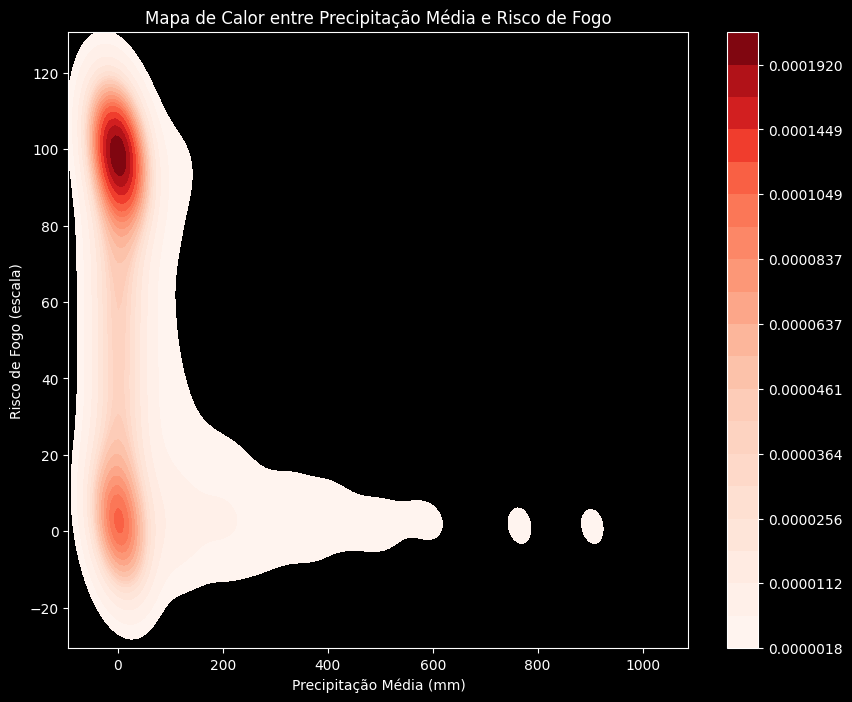

In [ ]:
caminho_arquivo = '/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv'
dados = pd.read_csv(caminho_arquivo)

dados = dados[['avg_risco_fogo', 'avg_precipitacao']].dropna()
dados = dados[dados['avg_precipitacao'] <= 1000]

# 5000 registros aleatorios
dados_sample = dados.sample(n=5000, random_state=42)

plt.style.use("dark_background")
plt.figure(figsize=(10, 8))

# Plotar kdeplot (densidade de kernel)
heatmap = sns.kdeplot(
    data=dados_sample, x='avg_precipitacao', y='avg_risco_fogo',
    cmap='Reds', fill=True, cbar=True, levels=20
)

heatmap.set_title("Mapa de Calor entre Precipitação Média e Risco de Fogo", color='white')
heatmap.set_xlabel("Precipitação Média (mm)", color='white')
heatmap.set_ylabel("Risco de Fogo (escala)", color='white')
plt.show()

À medida que a precipitação aumenta, o risco de fogo diminui, concentrando-se em valores baixos de risco. Isso indica que a falta de chuva contribui significativamente para o aumento do risco de incêndios, especialmente em áreas com pouca ou nenhuma precipitação.

2. Média de Focos por Região


Média de focos por região (ignorando valores nulos):
         regiao  media_focos
0  centro-oeste   155.878112
1      nordeste   119.397032
2         norte   127.444710
3       sudeste    94.661205
4           sul    79.750453


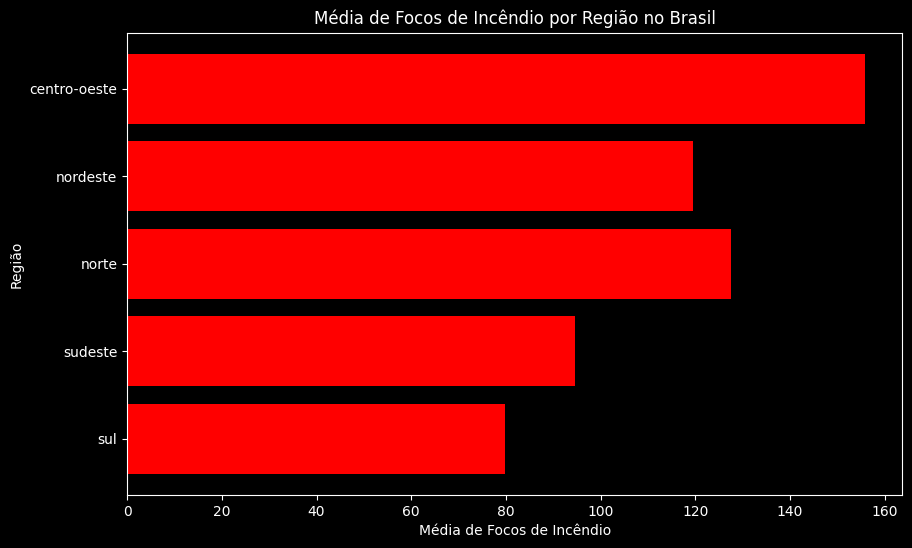

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

caminho_arquivo = '/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv'
dados = pd.read_csv(caminho_arquivo)

regiao_map = {
    'norte': ['acre', 'amapá', 'amazonas', 'pará', 'rondônia', 'roraima', 'tocantins'],
    'nordeste': ['alagoas', 'bahia', 'ceará', 'distrito federal', 'maranhão',
                 'paraíba', 'pernambuco', 'piauí', 'rio grande do norte', 'sergipe'],
    'centro-oeste': ['goiás', 'mato grosso', 'mato grosso do sul'],
    'sudeste': ['espírito santo', 'minas gerais', 'rio de janeiro', 'são paulo'],
    'sul': ['paraná', 'rio grande do sul', 'santa catarina']
}

dados['estado'] = dados['estado'].str.strip().str.lower()
dados['regiao'] = dados['estado'].apply(
    lambda estado: next((regiao for regiao, estados in regiao_map.items() if estado in estados), None)
)

media_focos_por_regiao = dados.groupby('regiao')['avg_frp'].mean().reset_index()
media_focos_por_regiao.rename(columns={'avg_frp': 'media_focos'}, inplace=True)
regioes = media_focos_por_regiao['regiao']
media_focos = media_focos_por_regiao['media_focos']

print("\nMédia de focos por região (ignorando valores nulos):")
print(media_focos_por_regiao)

plt.figure(figsize=(10, 6))
plt.barh(regioes, media_focos, color='red')
plt.xlabel('Média de Focos de Incêndio')
plt.ylabel('Região')
plt.title('Média de Focos de Incêndio por Região no Brasil')
plt.gca().invert_yaxis()
plt.show()

O Centro-Oeste como a área com a maior quantidade média de focos (155,88), seguido pelo Norte (127,44) e pelo Nordeste (119,39). A sua vegetação predominantemente de Cerrado e clima marcado por longos períodos secos, é particularmente vulnerável a incêndios.

3. Média de Risco de Fogo ao Longo do Tempo

<ipython-input-85-f780b2b10d08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['mes'] = dados['data'].dt.to_period('M')


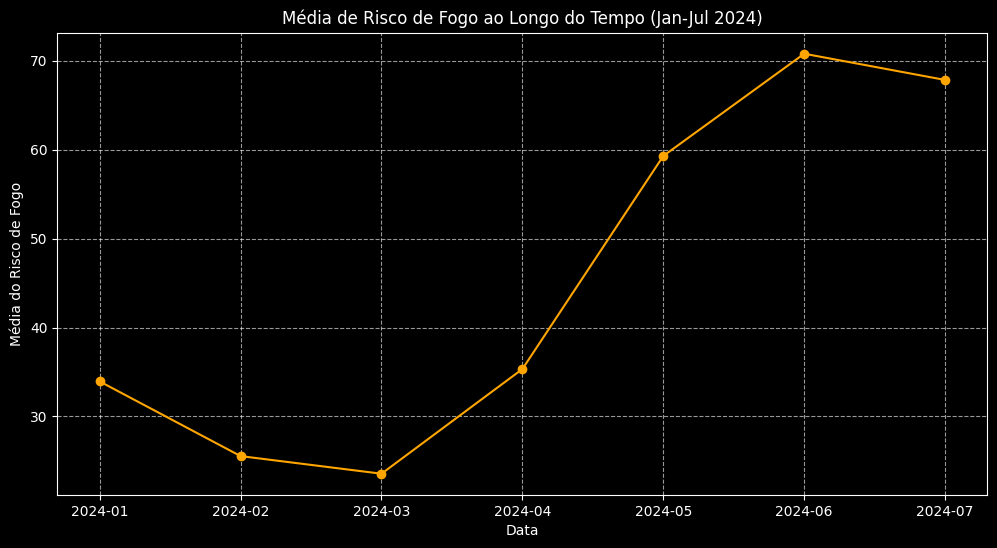

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

caminho_arquivo = '/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv'
dados = pd.read_csv(caminho_arquivo)

dados['data'] = pd.to_datetime(dados['data'], errors='coerce')
dados = dados[(dados['data'] >= '2024-01-01') & (dados['data'] <= '2024-07-01')]
dados['mes'] = dados['data'].dt.to_period('M')
dados_agrupados = dados.groupby('mes')['avg_risco_fogo'].mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(dados_agrupados.index.astype(str), dados_agrupados.values, color='orange', marker='o')
plt.title("Média de Risco de Fogo ao Longo do Tempo (Jan-Jul 2024)")
plt.xlabel("Data")
plt.ylabel("Média do Risco de Fogo")
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

Em janeiro, o risco médio começa em torno de 35 e diminui levemente até março. A partir de abril, há um aumento constante, com o risco atingindo seu pico em junho, próximo a 70, e mantendo-se elevado em julho.

4. Impacto da Chuva nos Incêndios

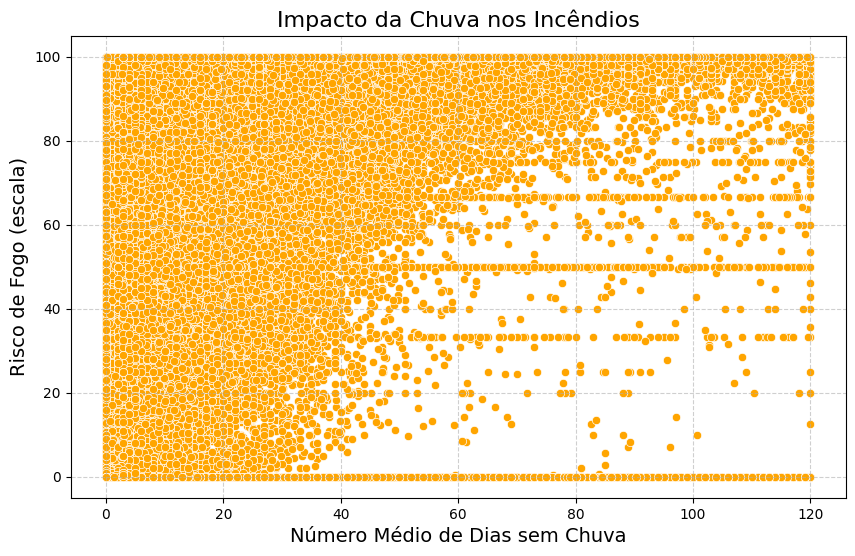

In [ ]:
caminho_arquivo = '/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv'
dados = pd.read_csv(caminho_arquivo)
dados = dados[['avg_numero_dias_sem_chuva', 'avg_risco_fogo']].dropna()

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    data=dados, x='avg_numero_dias_sem_chuva', y='avg_risco_fogo',
    color='orange', marker='o'
)

scatterplot.set_title("Impacto da Chuva nos Incêndios", fontsize=16)
scatterplot.set_xlabel("Número Médio de Dias sem Chuva", fontsize=14)
scatterplot.set_ylabel("Risco de Fogo (escala)", fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


A partir de cerca de 40 dias sem chuva, os pontos começam a se concentrar em valores mais altos de risco de fogo, até atingir valores próximos de 100 (escala máxima de risco) quando o número de dias secos é muito elevado (acima de 80 dias).

Tendências Históricas

A análise histórica nos permite ver como o número de incêndios evoluiu em cada bioma ao longo do tempo. Identificar biomas com tendências de aumento pode apontar para uma fragilidade crescente ou mudanças ambientais.

1. Tendência de Incêndios em Diferentes Biomas

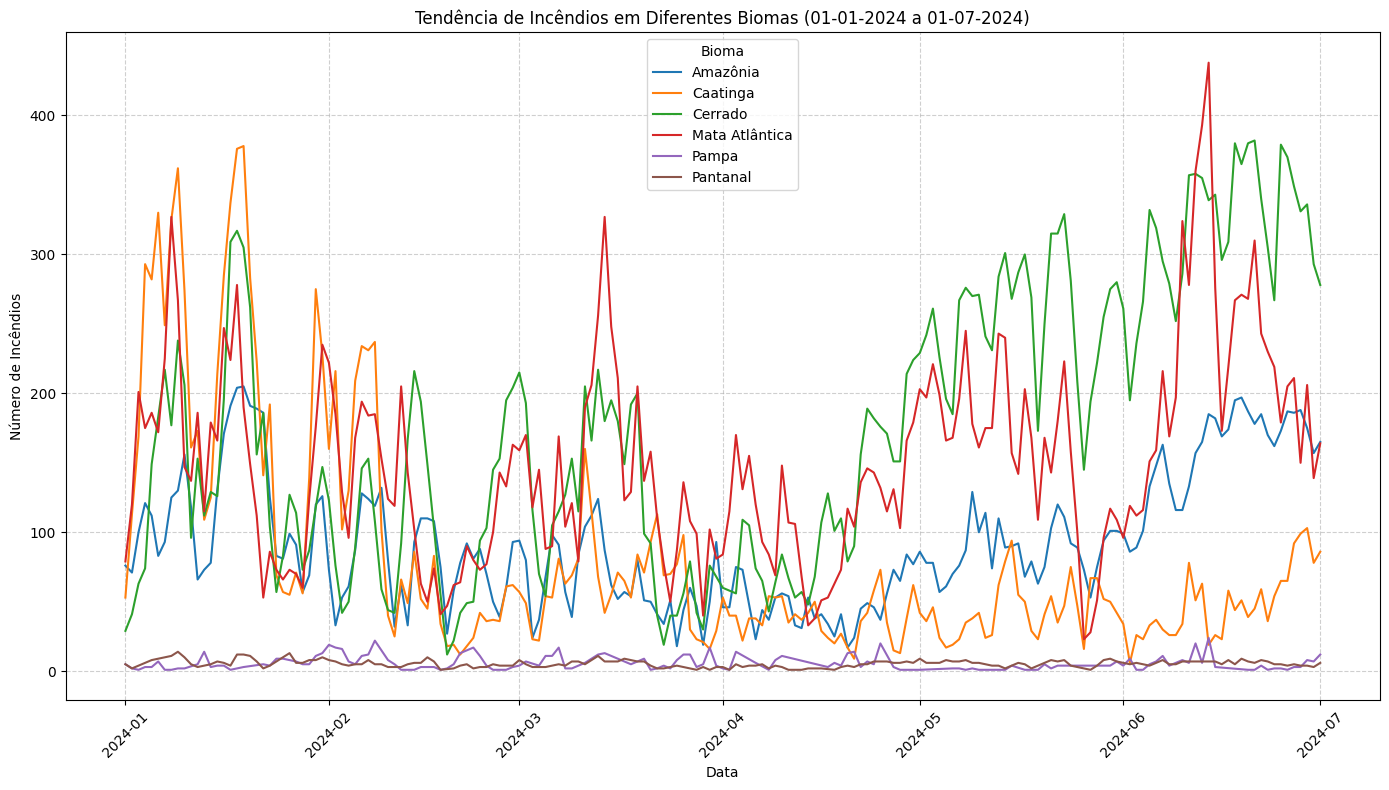

In [ ]:
caminho_arquivo = '/content/drive/My Drive/dados_incendios/Dataset_FireWatch_Brazil_Completo_2024.csv'
dados = pd.read_csv(caminho_arquivo)
dados['data'] = pd.to_datetime(dados['data'], errors='coerce')
dados = dados[(dados['data'] >= '2024-01-01') & (dados['data'] <= '2024-07-01')]
dados_agrupados = dados.groupby(['data', 'bioma']).size().reset_index(name='num_incendios')

biomas = dados_agrupados['bioma'].unique()

plt.figure(figsize=(14, 8))

for bioma in biomas:
    dados_bioma = dados_agrupados[dados_agrupados['bioma'] == bioma]

    plt.plot(dados_bioma['data'], dados_bioma['num_incendios'], label=bioma)

plt.title("Tendência de Incêndios em Diferentes Biomas (01-01-2024 a 01-07-2024)")
plt.xlabel("Data")
plt.ylabel("Número de Incêndios")
plt.legend(title='Bioma')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Cerrado (verde) e Amazônia (azul) apresentam as maiores variações e volumes de incêndios.
Observa-se picos significativos de incêndios em todos os biomas no início do ano e entre maio e junho.

## Conclusão

Em resumo, a análise dos incêndios no Brasil em 2024 demonstra uma forte relação entre o clima e a ocorrência de focos de fogo, especialmente durante a estação seca. O mês de setembro concentrou o maior número de incêndios, evidenciando picos sazonais, enquanto o Nordeste e o bioma Cerrado emergem como os mais afetados. Estados como Minas Gerais, Mato Grosso e Bahia registraram altos índices de incêndios, refletindo, em parte, as condições climáticas locais, como baixos índices de precipitação e longos períodos de estiagem, que agravam a vulnerabilidade à queimada. A correlação entre a ausência de chuvas e a alta incidência de focos reforça a importância de ações de monitoramento e políticas preventivas voltadas para os períodos e regiões de maior risco, especialmente no Cerrado e áreas adjacentes.